In [21]:
# Average depression (PHQ-8) score of adults during the coronavirus (COVID-19) pandemic by personal characteristics
# We will be focussing on key workers and non key workers

In [22]:
import pandas as pd
import os
import numpy as py
import seaborn as sns
import matplotlib as plt

In [23]:
# Load the data
df = pd.read_excel(r'../../4_integrated_csv_files/nhs_data/Depression Key Workers.xlsx')

In [24]:
df.info

<bound method DataFrame.info of                                     Unnamed: 0 July 2019 to March 2020  \
0                                          NaN         Unweighted base   
1                                          NaN                     NaN   
2                                   All adults                    3527   
3                                          NaN                     NaN   
4                                          Age                     NaN   
5                              16 to 39 years                      281   
6                               40 to 69 years                    2033   
7                            70 years and over                    1213   
8                                          NaN                     NaN   
9                                         Sex2                     NaN   
10                                         Men                    1625   
11                                       Women                    1902   
12    

In [25]:
df.columns

Index(['Unnamed: 0', 'July 2019 to March 2020', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'June 2020', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [26]:
df.head(5)

,Unnamed: 0,July 2019 to March 2020,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,June 2020,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
new_header = df.iloc[1]  
df.columns = new_header  # Move the info in index 1 to the column headers
df.head(5)


1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.tail(10)

1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Not working - Aged 16 to 64 years,467,9246800,5.6,4.4,6.8,467,9283700,7,5.8,8.1
40,Not working - Aged 65 years and over,1560,10152700,2.5,2.2,2.9,1560,10170700,3.9,3.5,4.3
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Household size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Single person household,1169,12023900,4.3,3.7,4.9,1192,11957100,5.9,5.4,6.5
44,Multi person household,2358,39919400,3,2.6,3.3,2335,40147100,5.1,4.7,5.5
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Parental status4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,No children under the age of 16,3100,38960500,3.4,3,3.8,3100,39072300,5.2,4.8,5.6
48,At least one child under the age of 16,427,12982700,2.9,2.3,3.4,427,13031900,5.6,4.9,6.3


In [29]:
df.shape

(49, 11)

In [30]:
# Drop index 1 as it is not required
df = df.drop(index=1)


In [31]:
df = df.reset_index(drop=True)

In [32]:
df.dtypes

1
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
dtype: object

In [33]:
df['Mean score'] = df['Mean score'].astype(float)

KeyError: 'Mean score'

In [34]:
df.head(10)

1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
1,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 to 39 years,281,19380900,3.9,3.2,4.6,268,19195600,6.8,6,7.5
5,40 to 69 years,2033,23744400,3.2,2.8,3.6,1959,23666000,4.7,4.3,5.1
6,70 years and over,1213,8818000,2.3,2,2.6,1300,9242500,3.7,3.3,4.1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sex2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Men,1625,25425900,2.8,2.4,3.3,1626,25526800,4.4,3.9,4.9


In [35]:
df.dtypes

1
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
NaN    object
dtype: object

In [36]:
# tidy NaN by changing to a blank space for clarity/tidiness
df = df.fillna('')
df.head(50)

1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
1,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
2,,,,,,,,,,,
3,Age,,,,,,,,,,
4,16 to 39 years,281,19380900,3.9,3.2,4.6,268,19195600,6.8,6,7.5
5,40 to 69 years,2033,23744400,3.2,2.8,3.6,1959,23666000,4.7,4.3,5.1
6,70 years and over,1213,8818000,2.3,2,2.6,1300,9242500,3.7,3.3,4.1
7,,,,,,,,,,,
8,Sex2,,,,,,,,,,
9,Men,1625,25425900,2.8,2.4,3.3,1626,25526800,4.4,3.9,4.9


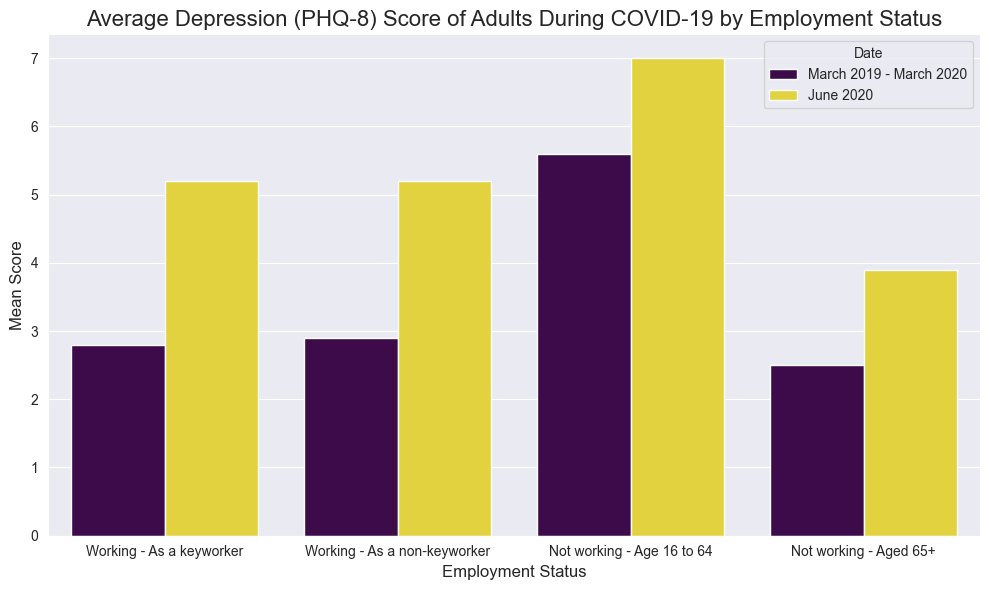

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Employment Status': ['Working - As a keyworker', 
                          'Working - As a non-keyworker',
                          'Not working - Age 16 to 64',
                          'Not working - Aged 65+' ],
    'March 2019 - March 2020': [2.8, 2.9, 5.6, 2.5],
    'June 2020': [5.2, 5.2, 7.0, 3.9]
        }


# Create a DataFrame
df = pd.DataFrame(data)

# Reshape data for plotting
df_melted = df.melt(id_vars="Employment Status", value_vars=["March 2019 - March 2020", "June 2020"], var_name="Date", value_name="Mean Score")

# Define a colorblind-safe colour palette 
color_palette = [
    '#440154',  # Purple
    '#FDE725',  # Yellow
]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Employment Status', y='Mean Score', palette=color_palette, hue='Date', errorbar=None)

# Customize the plot
plt.title("Average Depression (PHQ-8) Score of Adults During COVID-19 by Employment Status", fontsize=16)
plt.xlabel("Employment Status", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()

plt.savefig(r'../../8_final_visualisations/mental_health/average_depression_score_of_adults_during_covid_employment_status')

plt.show()


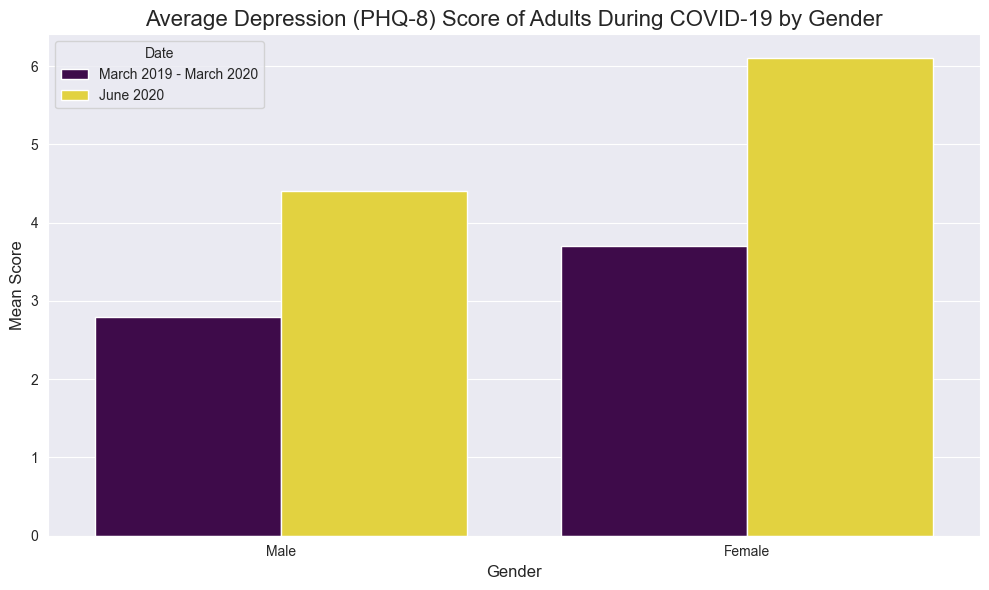

In [40]:
data = {
    'Gender':[ 'Male', 
               'Female' ],
    'March 2019 - March 2020': [2.8, 3.7],
    'June 2020': [4.4, 6.1]
        }


# Create a DataFrame
df = pd.DataFrame(data)

# Reshape data for plotting
df_melted = df.melt(id_vars="Gender", value_vars=["March 2019 - March 2020", "June 2020"], var_name="Date", value_name="Mean Score")

# Define a colorblind-safe colour palette 
color_palette = [
    '#440154',  # Purple
    '#FDE725',  # Yellow
]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Gender', y='Mean Score', palette=color_palette, hue='Date', errorbar=None)

# Customize the plot
plt.title("Average Depression (PHQ-8) Score of Adults During COVID-19 by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()

plt.savefig(r'../../8_final_visualisations/mental_health/average_depression_score_adults_by_gender')


plt.show()
